# Exercise 3 Solution
> by GONG ZERUI, 2022.02.11 

----

### Preparations


Importing NumPy, Pandas, Matplotlib, and Seaborn.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

Importing the training dataset in Jupyter Notebook

In [3]:
trainData = pd.read_csv('train.csv')
trainData.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


----------------

### Problem 1: Analysis of Numeric Variables

In [4]:
LotArea = trainData['LotArea']
GrLivArea = trainData['GrLivArea']
TotalBsmtSF = trainData['TotalBsmtSF']
GarageArea = trainData['GarageArea']
SalePrice = trainData['SalePrice']


##### a) Which of these variables has the maximum number of outliers as per box-plot? How many outliers does it have?

<AxesSubplot:>

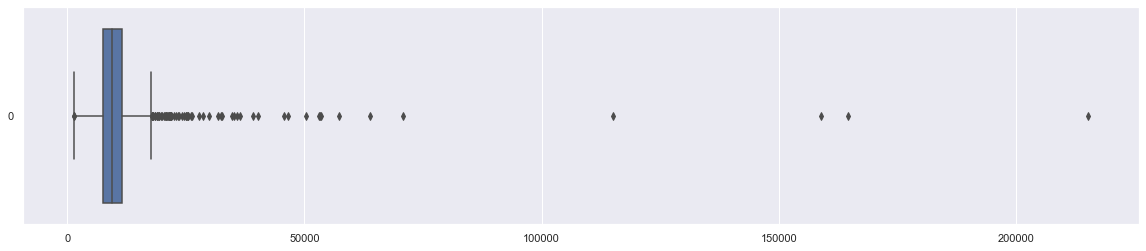

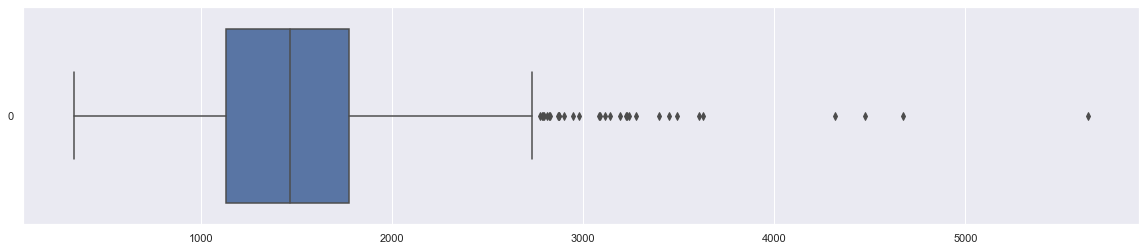

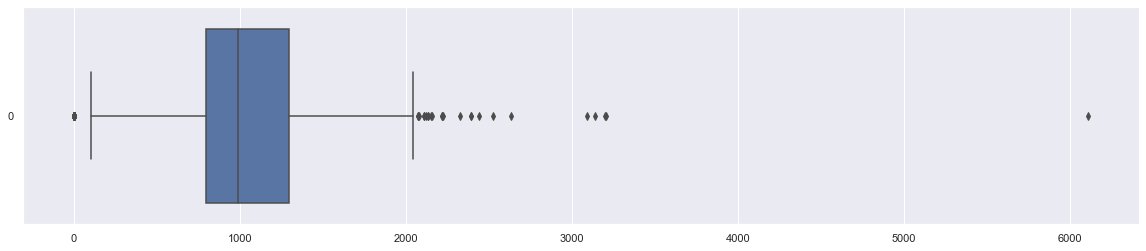

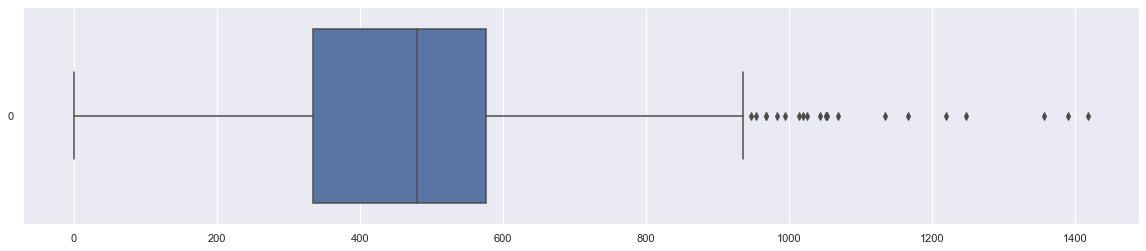

In [5]:
f = plt.figure(figsize = (20,4))
sb.boxplot(data = LotArea, orient = 'h')
f = plt.figure(figsize = (20,4))
sb.boxplot(data = GrLivArea, orient = 'h')
f = plt.figure(figsize = (20,4))
sb.boxplot(data = TotalBsmtSF, orient = 'h')
f = plt.figure(figsize = (20,4))
sb.boxplot(data = GarageArea, orient = 'h')

From the above box-plots we can intuitively see that 'Lot Area' seems to have the most outliers. In order to find out is it really the fact, I wrote the following function to calculate the number of outliers.

In [6]:
def countOutlier(df):
    Q1 = df.quantile(.25)
    Q3 = df.quantile(.75)
    IQR = Q3-Q1
    count = 0
    for i in df:
        if i > (Q3+1.5*IQR) or i < (Q1-1.5*IQR):
            count+=1
    return count

print("LotArea has", countOutlier(LotArea), "outliers.")
print("GrLivArea has", countOutlier(GrLivArea), "outliers.")
print("TotalBsmtSF has", countOutlier(TotalBsmtSF), "outliers.")
print("GarageArea has", countOutlier(GarageArea), "outliers.")

LotArea has 61 outliers.
LotArea has 69 outliers.
GrLivArea has 31 outliers.
TotalBsmtSF has 61 outliers.
GarageArea has 21 outliers.


From the outputs of the function one can see that indeed 'LotArea' has the maximum number of outliers as per box-plot. The maximum number is 69.

##### b) Which of these variables is the most skewed from a regular normal distribution? Is the skew positive or negative?

<AxesSubplot:xlabel='GarageArea', ylabel='Count'>

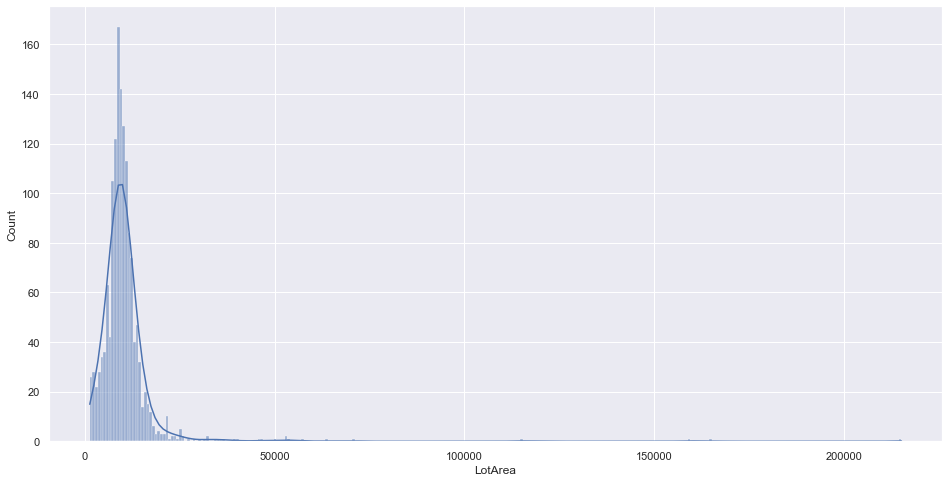

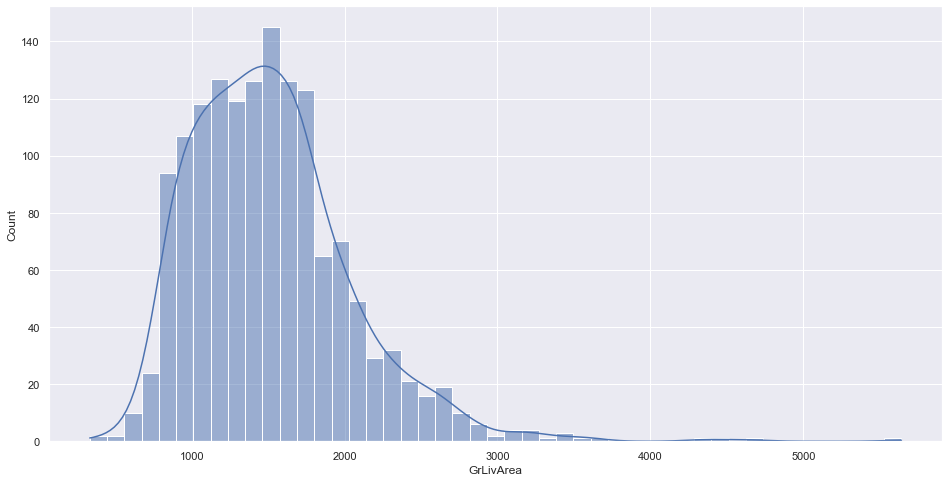

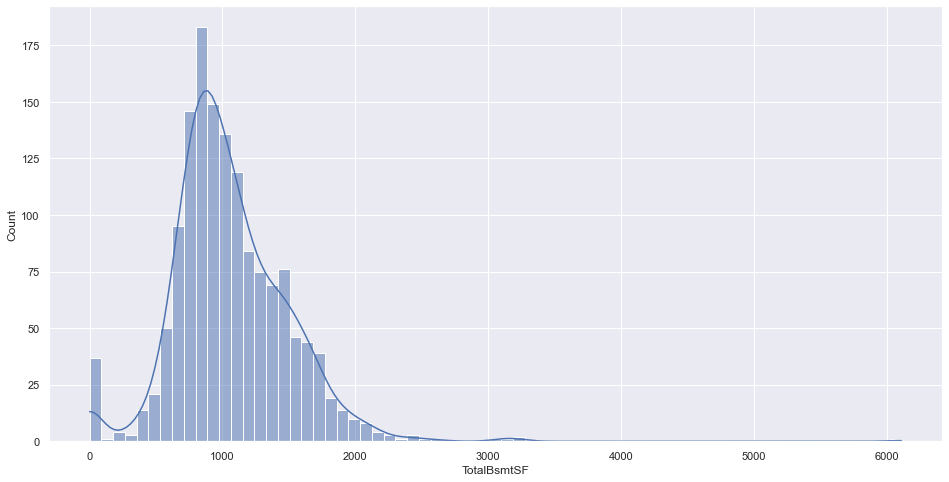

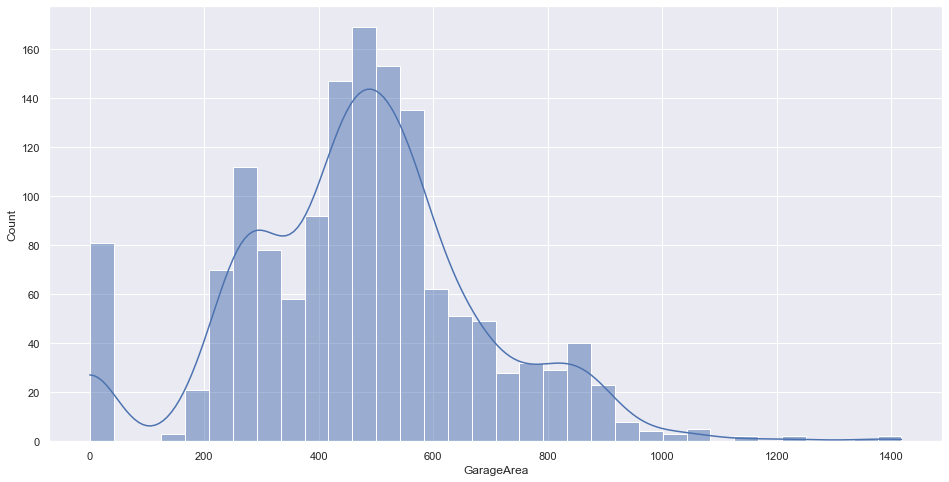

In [7]:
f = plt.figure(figsize = (16,8))
sb.histplot(data = LotArea, kde = True)
f = plt.figure(figsize = (16,8))
sb.histplot(data = GrLivArea, kde = True)
f = plt.figure(figsize = (16,8))
sb.histplot(data = TotalBsmtSF, kde = True)
f = plt.figure(figsize = (16,8))
sb.histplot(data = GarageArea, kde = True)

From the above histograms and KDEs we can see that 'LotArea' is the most skewed from a regular distribution? It is heavily right-skewed (positive skewed).

##### C) Choose the top two variables that you think will help us the most in predicting ‘SalePrice’ of houses in this data.

To evaluate the significance of each variable in predicting the SalePrice, I can calculate the correlation between the two variables using the following code.

In [8]:
def findCorrelation(df1, df2):
    return df1.corr(df2)


print(findCorrelation(LotArea, SalePrice))
print(findCorrelation(GrLivArea, SalePrice))
print(findCorrelation(TotalBsmtSF, SalePrice))
print(findCorrelation(GarageArea, SalePrice))


0.26384335387140556
0.7086244776126521
0.6135805515591954
0.6234314389183615


Based on the correlation coefficient calculated above and the definition of the correlation coefficient. I conclude that the top two variables that I think will help me most in predicting 'SalePrice' of houses in this data is 'GrLivArea' and 'GarageArea'. Though the latter is very close to 'TotalBsmtSF' in terms of correlation coefficient, the calculation before has shown that 'GarageArea' has less outliers, which makes it even more suitable in this context.

---

### Problem 2: Analysis of Categorical Variables



In [9]:
MSSubClass = trainData['MSSubClass']
Neighborhood = trainData['Neighborhood']
BldgType = trainData['BldgType']
OverallQual = trainData['OverallQual']

##### a) Which of these variables has the highest number of levels? Which of the levels has the highest number of houses?

According to the data_description file:
* 'MSSubClass' has 16 levels.
* 'Neighborhood' has 25 levels.
* 'BldgType' has 5 levels.
* 'OverallQual' has 10 levels.

So, for the first question, it is clear the the variable 'Neighborhood' has the highest number of levels. Next, I'm going to calculate which of the levels has the highest number of houses for 'Neighborhood'.

count      1460
unique       25
top       NAmes
freq        225
Name: Neighborhood, dtype: object

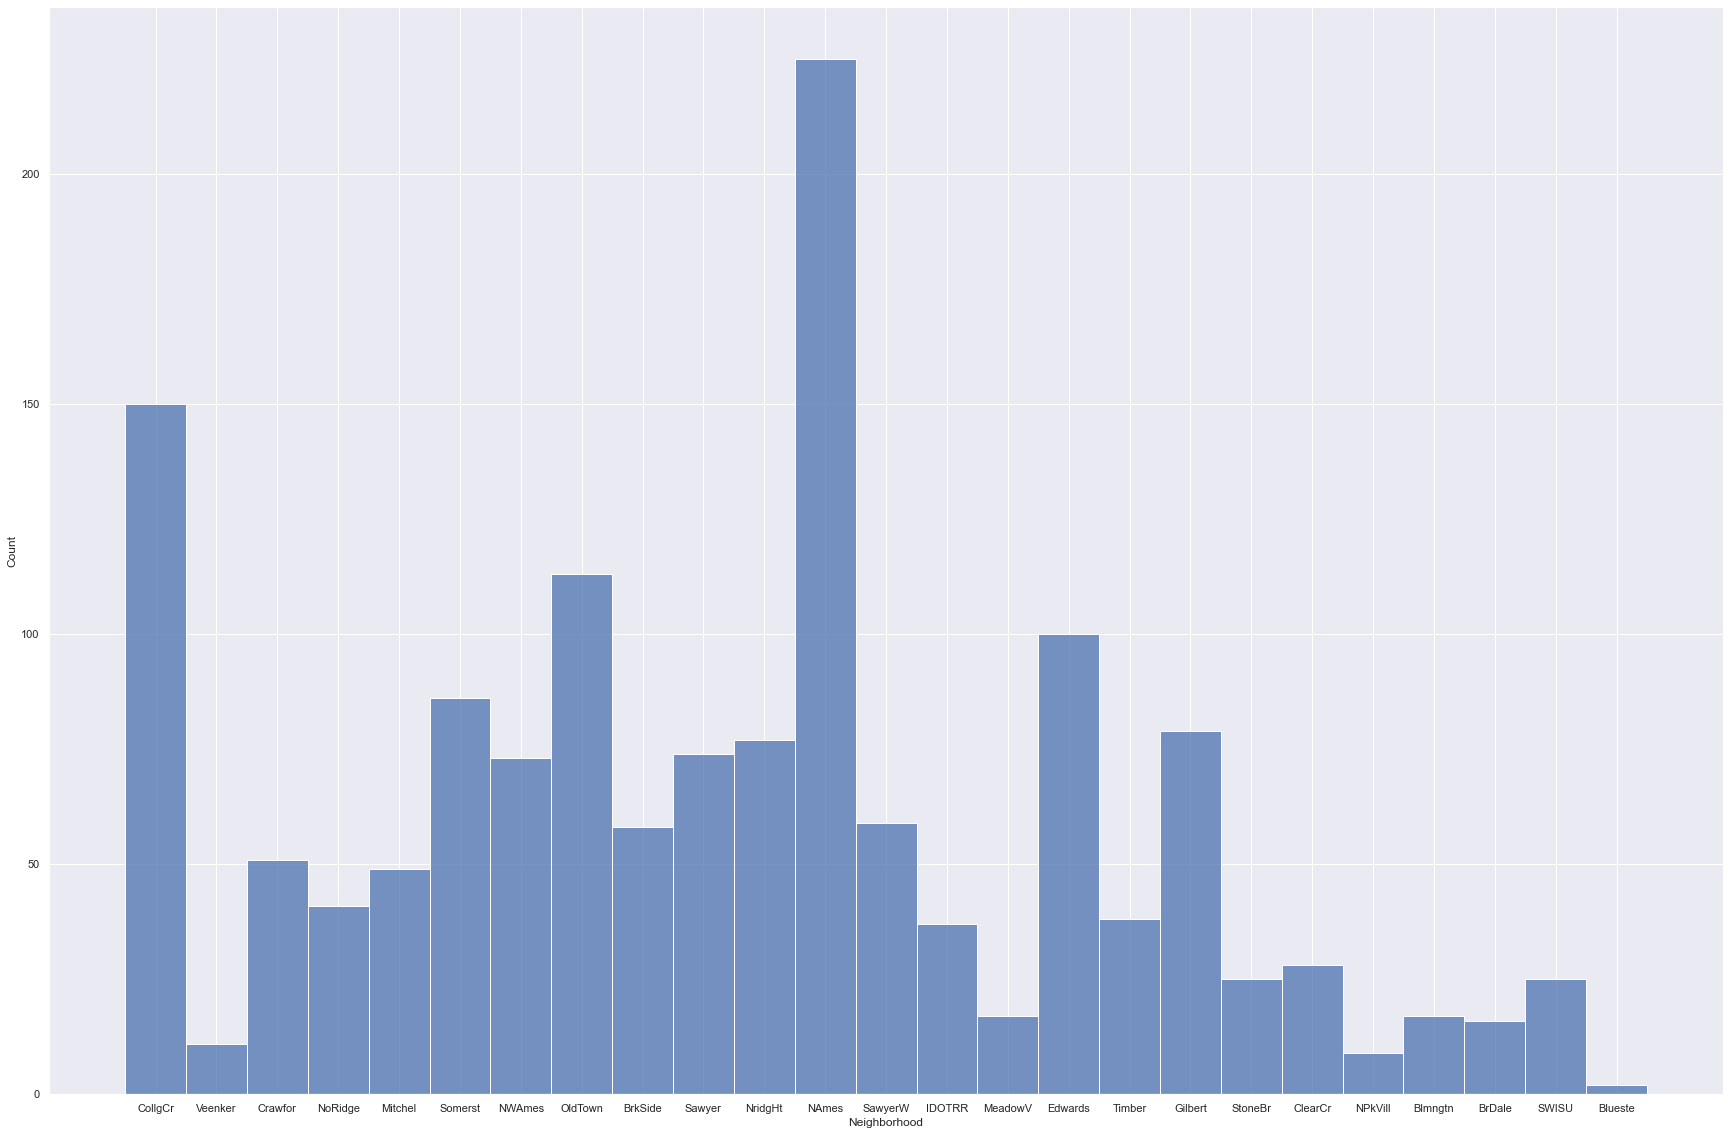

In [10]:
# Neighborhood 25 levels
f = plt.figure(figsize = (30, 20))
sb.histplot(Neighborhood, stat = 'count')
Neighborhood.describe()

From the above table and the histogram we can see that the level 'NAmes' has the highest number of houses in 'Neighborhood', the count is 225.

##### b) Choose the top two variables that you think will help us the most in predicting ‘SalePrice’ of houses in this data.

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

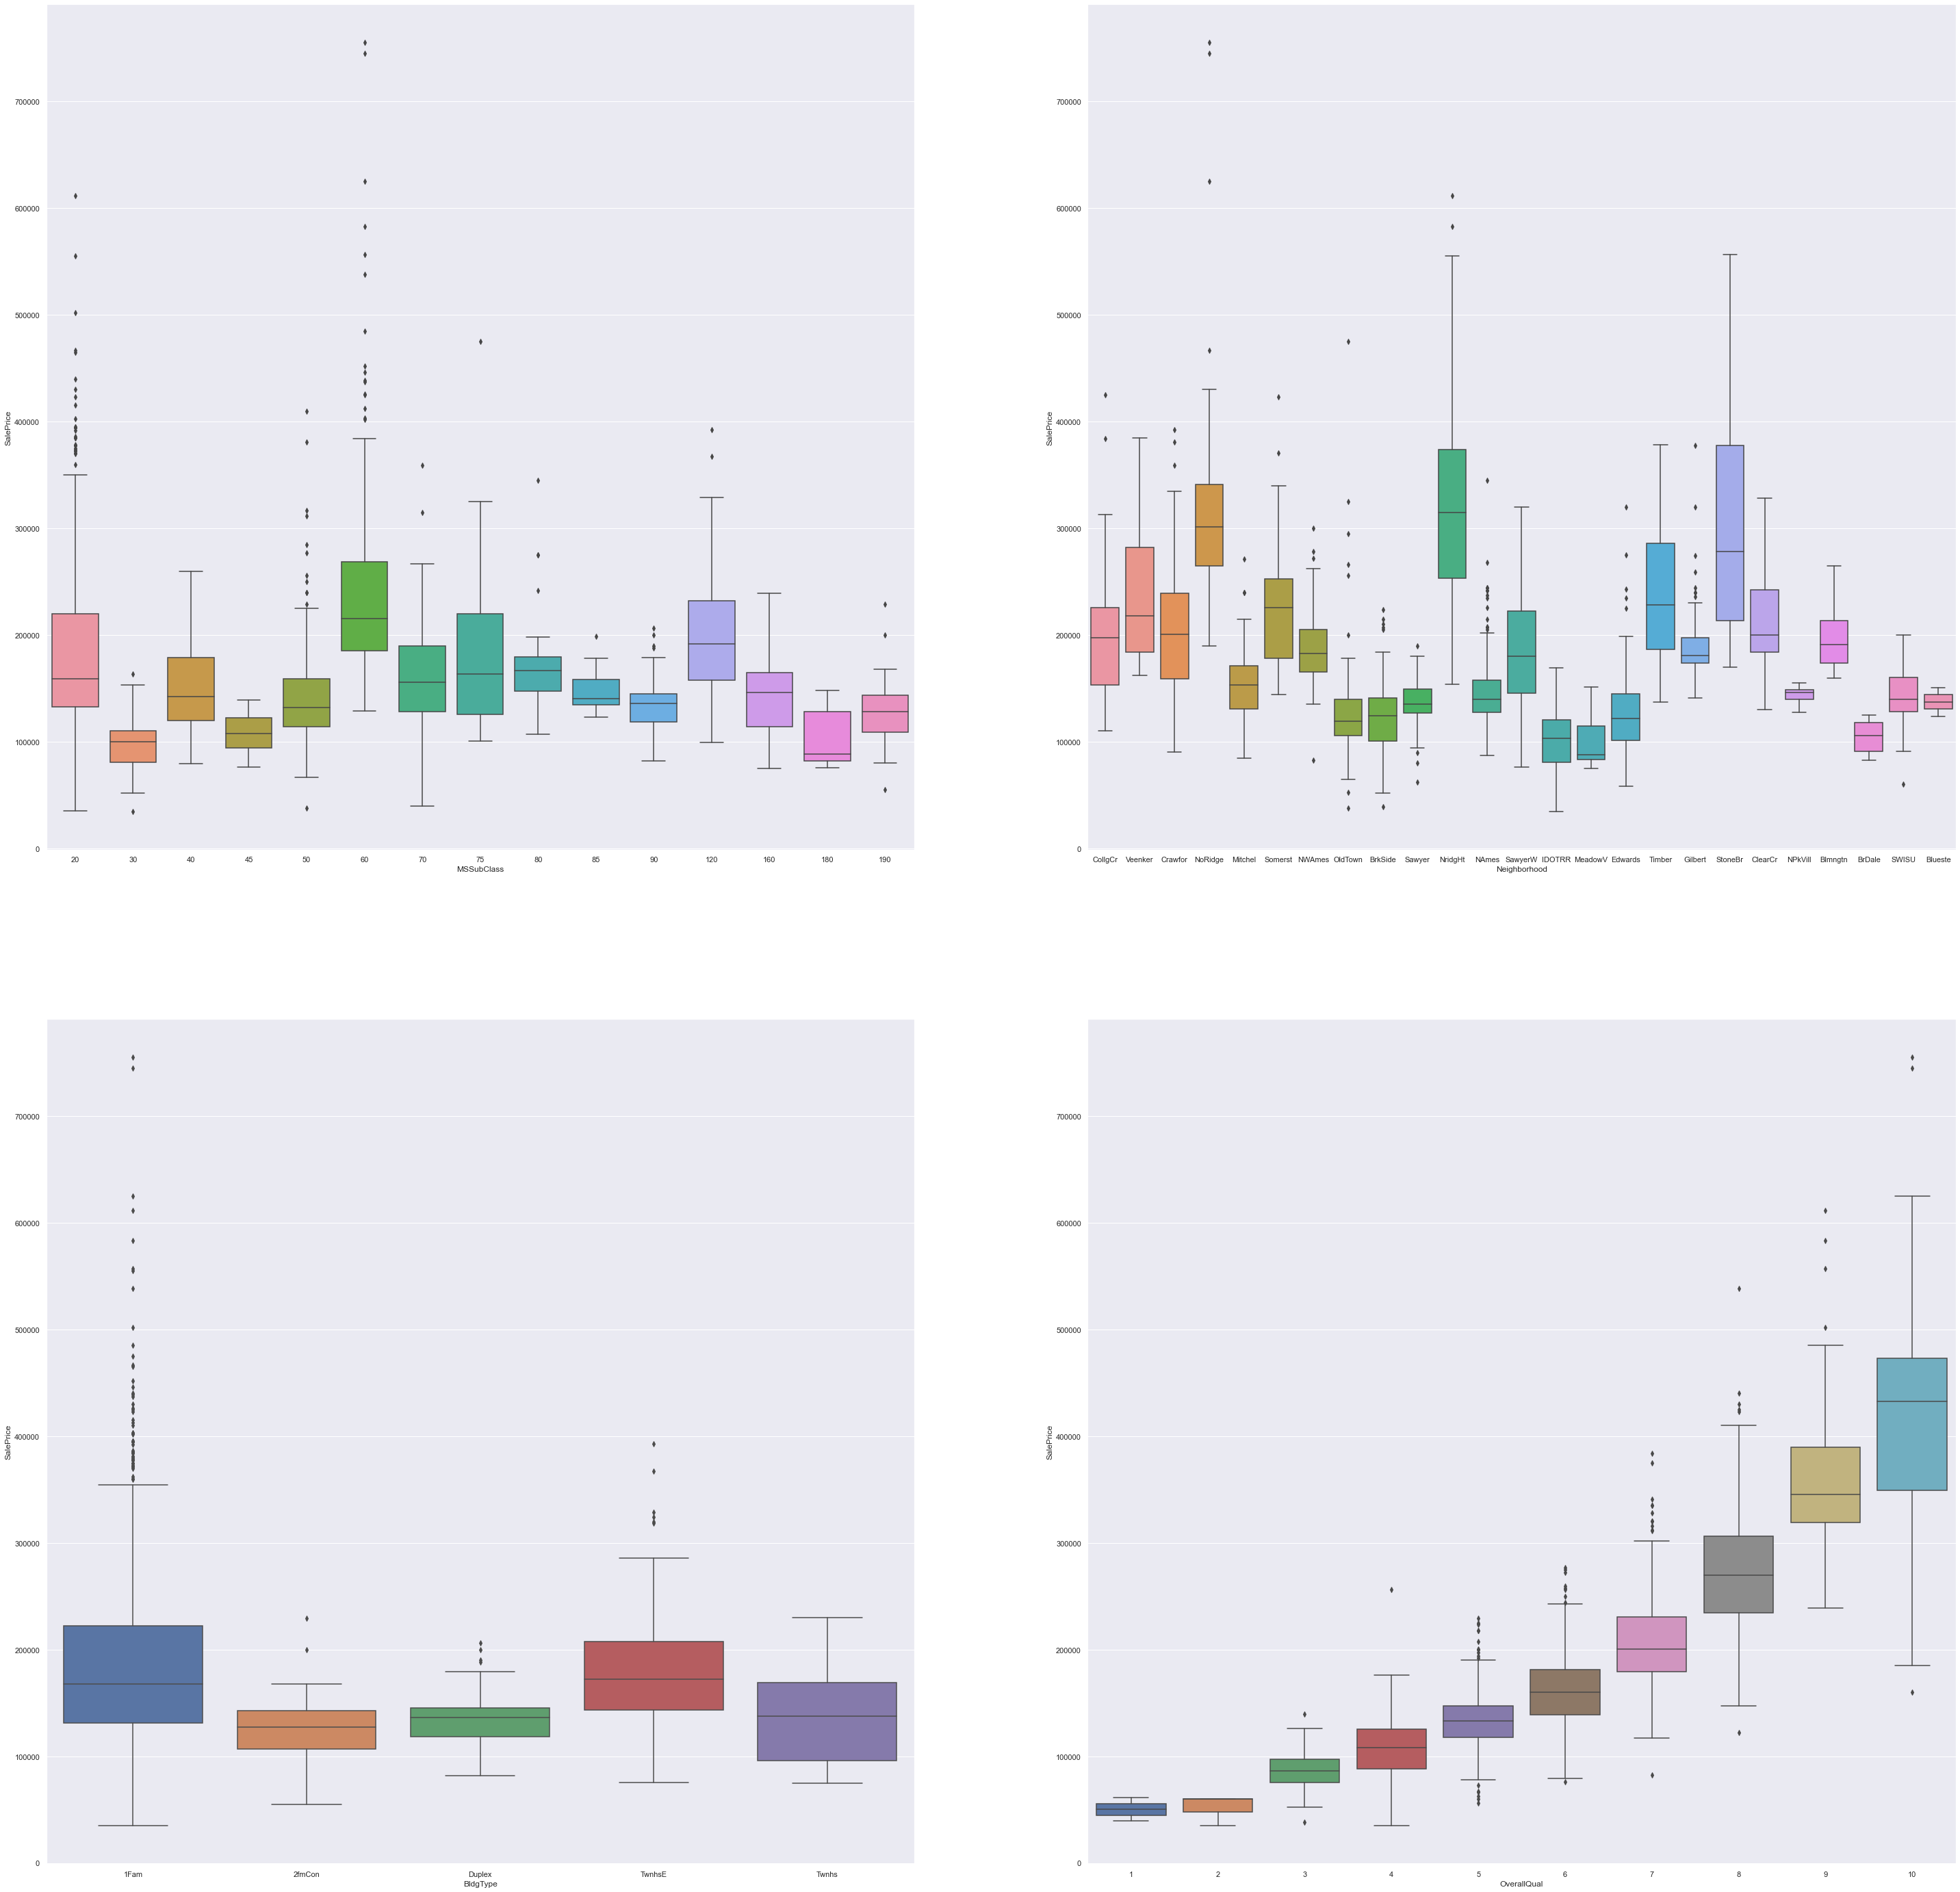

In [11]:
f, axes = plt.subplots(2, 2, figsize=(50, 50))
sb.boxplot(x= "MSSubClass", y= "SalePrice", data=trainData, ax = axes[0,0])
sb.boxplot(x= "Neighborhood", y= "SalePrice", data=trainData, ax = axes[0,1])
sb.boxplot(x= "BldgType", y= "SalePrice", data=trainData, ax = axes[1,0])
sb.boxplot(x= "OverallQual", y= "SalePrice", data=trainData, ax = axes[1,1])

From the above bar-plots I conclude that the top two variables that I think will help me the most in predicting 'SalePrice' of houses in this data are 'Neighborhood' and 'OverallQual'
'OverallQual' is an easy pick, as the box-plot suggests, the level of 'OverallQual' is positively correlated with 'SalePrice'. Once we know a certain house's level in 'SalePrice', we can successfully narrow down and predict its 'SalePrice'.
The reason I picked 'Neighborhood' as well is: The 'SalePrice' within each of its levels. (aka. different neighborhoods) is somewhat bell-shaped with less outliers than 'MSSubClass'. Thus, once we know the neighborhood a house is in, we can narrow down and predict its 'SalePrice' based on the average price of that neighborhood, the respective distribution and other parameters.


### Problem 3 : Interesting Questions for EDA
##### b) Does the SalePrice of a house get affected by how recently it got Remodeled? Justify your answer using EDA.
Step 1: Clean up data and extract relevant variables

From the data_description file, I found the variable 'YearBuilt' and 'YearRemodAdd' related to this particular problem. However, since some houses are not remodeled ever since they were built, a new variable 'houseAge' can be defined as follows:
* Exclude all houses that have never been remodeled: aka. YearBuilt = YearRemodAdd
* Exclude all houses that have been remoded after it was solded
* Calculate the house age according to the most recent remodel year and the year it was sold.

In [12]:
# exclude houses that was never remodeled
df = trainData.drop(
    trainData[trainData["YearBuilt"] == trainData["YearRemodAdd"]].index
)
# exclude houses that was remodeled after it was sold
df = df.drop(df[df["YearRemodAdd"] > df["YrSold"]].index)

# calculate houseAge
houseAge = df["YrSold"] - df["YearRemodAdd"]
houseAge.head()


2     6
3    36
5    14
6     2
8    58
dtype: int64

Step 2: Detect outliers and anomalies

Here I will discover whether there exist outliers and anomalies in the variable 'houseAge'

In [13]:
print("Number of outliers in houseAge: ", countOutlier(houseAge))

Number of outliers in houseAge:  0


From the above function output of houseAge, we can see there are no outliers in the variable 'houseAge'

Step 3: Assumptions and testing

It is reasonable to assume that houseAge is negatively correlated with SalePrice because normally people would prefer newer houses to older houses. Here I will test whether this is the case.


-0.4502294083841025


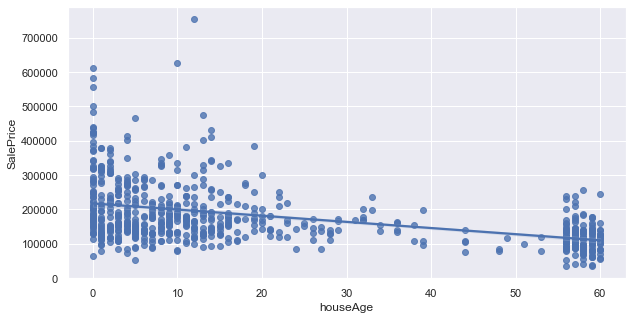

In [14]:
f = plt.figure(figsize=(10, 5))
x, y = pd.Series(houseAge, name="houseAge"), pd.Series(df['SalePrice'], name="SalePrice")
sb.regplot(x = x, y = y)
print(findCorrelation(houseAge, SalePrice))

From the above graph and the function output of findCorrelation we can see that the houseAge and SalePrice indeed has a negative correlation. They are moderately correlated with a correlation coefficient of 0.450. Also, one can see from the graph that houses with houseAge below 20 years are more desired by customers because there are more data points when x < 30 compare to the rest. In addition, some houses that are never remodeled still have higher SalePrice than houses with lower houseAge. This shows that housePrice are correlated with other variables as well. In order to find out, more analysis shall be conducted.